In [1]:
!pip install datasets

In [2]:
from datasets import get_dataset_config_names

dataset = 'McAuley-Lab/Amazon-Reviews-2023'

try:
    dataset_branches = get_dataset_config_names(dataset, trust_remote_code=True)
except Exception as e:
    dataset_branches = f"Error fetching branches: {e}"

item_metadata_branches = []
user_review_branches = []
categories = []


for branch in dataset_branches:
    if branch.startswith("raw_meta_"):
        item_metadata_branches.append(branch)
    elif branch.startswith("raw_review_"):
        user_review_branches.append(branch)

for branch in item_metadata_branches:
    categories.append(branch.replace('raw_meta_', ''))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
categories

['All_Beauty',
 'Toys_and_Games',
 'Cell_Phones_and_Accessories',
 'Industrial_and_Scientific',
 'Gift_Cards',
 'Musical_Instruments',
 'Electronics',
 'Handmade_Products',
 'Arts_Crafts_and_Sewing',
 'Baby_Products',
 'Health_and_Household',
 'Office_Products',
 'Digital_Music',
 'Grocery_and_Gourmet_Food',
 'Sports_and_Outdoors',
 'Home_and_Kitchen',
 'Subscription_Boxes',
 'Tools_and_Home_Improvement',
 'Pet_Supplies',
 'Video_Games',
 'Kindle_Store',
 'Clothing_Shoes_and_Jewelry',
 'Patio_Lawn_and_Garden',
 'Unknown',
 'Books',
 'Automotive',
 'CDs_and_Vinyl',
 'Beauty_and_Personal_Care',
 'Amazon_Fashion',
 'Magazine_Subscriptions',
 'Software',
 'Health_and_Personal_Care',
 'Appliances',
 'Movies_and_TV']

In [42]:
import pandas as pd
from datasets import load_dataset

dataset = 'McAuley-Lab/Amazon-Reviews-2023'

# item = load_dataset(dataset, 'raw_meta_' + categories[0], trust_remote_code=True)
# review = load_dataset(dataset, 'raw_review_' + categories[0], trust_remote_code=True)

# item_metadata_columns = item['full'][0].keys()
# user_review_columns = review['full'][0].keys()
# item_metadata = pd.DataFrame(columns = item_metadata_columns)
# user_reviews = pd.DataFrame(columns = user_review_columns)

chosen_categories = ['Software']

for category in chosen_categories:
    items = load_dataset(dataset, 'raw_meta_' + category, trust_remote_code=True)
    item_metadata = items['full'].to_pandas()
    # item_metadata = pd.concat([item_metadata, new_data], ignore_index = True)
    reviews = load_dataset(dataset, 'raw_review_' + category, trust_remote_code=True)
    user_reviews = reviews['full'].to_pandas()
    # user_reviews = pd.concat([user_reviews, new_data], ignore_index = True)

del items
del reviews

In [9]:
item_metadata.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Appstore for Android,Accupressure Guide,3.6,NaN,[All the pressing point has been explained wit...,[Acupressure technique is very ancient and ver...,0.0,"{'hi_res': [None, None, None, None], 'large': ...","{'title': [''], 'url': [''], 'user_id': ['']}",mAppsguru,[],"{""Release Date"": ""2015"", ""Date first listed on...",B00VRPSGEO,None,None,None
1,Appstore for Android,Ankylosaurus Fights Back - Smithsonian's Prehi...,4.0,NaN,[ENCOURAGE literacy skills with highlighted na...,[Join Ankylosaurus in this interactive book ap...,2.99,"{'hi_res': [None, None, None, None, None], 'la...","{'title': [''], 'url': [''], 'user_id': ['']}","Oceanhouse Media, Inc",[],"{""Release Date"": ""2014"", ""Date first listed on...",B00NWQXXHQ,None,None,None
2,Appstore for Android,Mahjong 2015,3.1,NaN,[Mahjong 2015 is a free solitaire matching gam...,[Mahjong 2015 is a free solitaire matching gam...,0.0,"{'hi_res': [None, None, None], 'large': ['http...","{'title': [''], 'url': [''], 'user_id': ['']}",sophiathach,[],"{""Release Date"": ""2014"", ""Date first listed on...",B00RFKP6AC,None,None,None
3,Appstore for Android,Jewels Brick Breakout,4.2,NaN,"[Game Features:, - Intuitive touch controls wi...",[Jewels Brick Breakout is a glowing jewels bri...,0.0,"{'hi_res': [None, None, None, None, None, None...","{'title': [''], 'url': [''], 'user_id': ['']}",Bad Chicken,[],"{""Release Date"": ""2015"", ""Date first listed on...",B00SP2QU0E,None,None,None
4,Appstore for Android,Traffic Police: Off-Road Cub,3.3,NaN,"[In this game you will find:, - Killer police ...",[Become the best road police officer in Cube C...,0.0,"{'hi_res': [None, None, None, None], 'large': ...","{'title': [''], 'url': [''], 'user_id': ['']}",Dast 2 For Metro,[],"{""Release Date"": ""2016"", ""Date first listed on...",B01DZIT64O,None,None,None


In [10]:
user_reviews.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,1.0,malware,mcaffee IS malware,[],B07BFS3G7P,B0BQSK9QCF,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,1562182632076,0,False
1,5.0,Lots of Fun,I love playing tapped out because it is fun to...,[],B00CTQ6SIG,B00CTQ6SIG,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,1424120336000,0,True
2,5.0,Light Up The Dark,I love this flashlight app! It really illumin...,[],B0066WJLU6,B0066WJLU6,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,1362399267000,0,True
3,4.0,Fun game,One of my favorite games,[],B00KCYMAWK,B00KCYMAWK,AH6CATODIVPVUOJEWHRSRCSKAOHA,1561061428662,0,True
4,4.0,I am not that good at it but my kids are,Cute game. I am not that good at it but my kid...,[],B00P1RK566,B00P1RK566,AEINY4XOINMMJCK5GZ3M6MMHBN6A,1418257196000,0,True


# Basic Structure & Summary (Software)

### Item Metadata: Key Columns

main_category <br>
title <br>
average_rating <br>
rating_number <br>
features <br>
price <br>
store <br>
parent_asin <br>
bought_together <br>

### Item Metadata: Data Cleaning

In [33]:
item_metadata = item_metadata[['parent_asin', 'title', 'average_rating', 'rating_number', 'main_category', 'features', 'description', 'price', 'store']]
item_metadata['average_rating'] = item_metadata['average_rating'].fillna(0)
item_metadata['average_rating'] = item_metadata['average_rating'].astype(float)
item_metadata['rating_number'] = item_metadata['rating_number'].fillna(0)
item_metadata['rating_number'] = item_metadata['rating_number'].astype(int)
item_metadata['main_category'] = item_metadata['main_category'].fillna('Unknown')
item_metadata['main_category'] = item_metadata['main_category'].replace('None', 'Unknown')
item_metadata['price'] = item_metadata['price'].replace('None', 0.0)
item_metadata['price'] = item_metadata['price'].astype(float)
item_metadata['store'] = item_metadata['store'].fillna('Unknown')
item_metadata.info()

<ipython-input-33-670593b19c76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_metadata['average_rating'] = item_metadata['average_rating'].fillna(0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89251 entries, 0 to 89250
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   parent_asin     89251 non-null  object 
 1   title           89251 non-null  object 
 2   average_rating  89251 non-null  float64
 3   rating_number   89251 non-null  int64  
 4   main_category   89251 non-null  object 
 5   price           89251 non-null  float64
 6   store           89251 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 4.8+ MB


### User Reviews: Key Columns

rating <br>
title <br>
text <br>
parent_asin <br>
user_id <br>
timestamp <br>

### User Reviews: Data Cleaning

In [58]:
from datetime import datetime
user_reviews = user_reviews[['user_id', 'parent_asin', 'rating', 'title', 'text', 'timestamp', 'helpful_vote', 'verified_purchase']]
user_reviews['rating'] = user_reviews['rating'].astype(int)
user_reviews['title'] = user_reviews['title'].replace('N9ne', 'None')
user_reviews['title'] = user_reviews['title'].replace('None', '')
user_reviews['text'] = user_reviews['text'].replace('N9ne', 'None')
user_reviews['text'] = user_reviews['text'].replace('None', '')
user_reviews['timestamp'] = user_reviews['timestamp'].apply(lambda x: datetime.utcfromtimestamp(x/1000))
user_reviews['helpful_vote'] = user_reviews['helpful_vote'].fillna(0)
user_reviews['verified_purchase'] = user_reviews['verified_purchase'].astype(int)
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4880181 entries, 0 to 4880180
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   user_id            object        
 1   parent_asin        object        
 2   rating             int64         
 3   title              object        
 4   text               object        
 5   timestamp          datetime64[ns]
 6   helpful_vote       int64         
 7   verified_purchase  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 297.9+ MB


In [59]:
missing_counts = user_reviews.isnull().sum()
missing_percentage = (missing_counts / len(user_reviews)) * 100
missing_percentage

,0
user_id,0.0
parent_asin,0.0
rating,0.0
title,0.0
text,0.0
timestamp,0.0
helpful_vote,0.0
verified_purchase,0.0


Number of Items (from User Reviews)



In [8]:
len(user_reviews['parent_asin'].unique())

89246

Number of users

In [9]:
len(user_reviews['user_id'].unique())

2589466

# User-item interaction sparsity

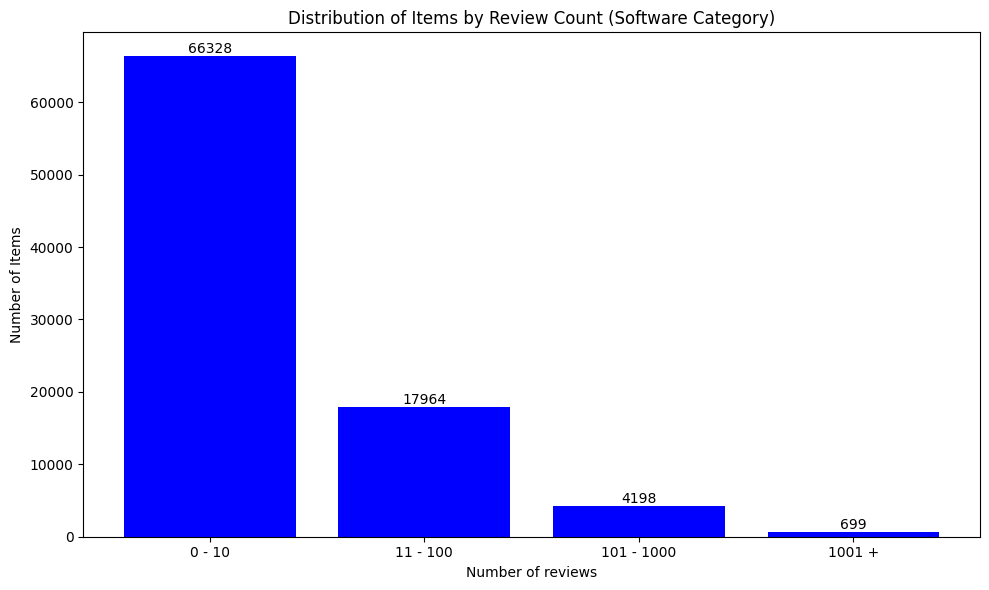

In [39]:
import matplotlib.pyplot as plt

item_review_counts = user_reviews['parent_asin'].value_counts()

bins = [0, 10, 100, 1000, 10000]
bin_labels = ['0 - 10', '11 - 100', '101 - 1000', '1001 +']

item_review_counts_binned = pd.cut(item_review_counts, bins=bins, labels=bin_labels, right=False)

bin_counts = item_review_counts_binned.value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(bin_counts.index, bin_counts.values, color='blue')
plt.xlabel("Number of reviews")
plt.ylabel("Number of Items")
plt.title("Distribution of Items by Review Count (Software Category)")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
             ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

In [48]:
item_metadata[item_metadata['parent_asin'] == 'B00N28818A']

,parent_asin,title,average_rating,rating_number,main_category,price,store
17448,B00N28818A,Amazon Prime Video,4.5,221326.0,Appstore for Android,0.0,Amazon.com


In [30]:
user_reviews[user_reviews['parent_asin'] == 'B00N28818A']

,user_id,parent_asin,rating,title,text,timestamp
662,AGDUXF4E7K4X5WBBCKNPG6AD2UCA,B00N28818A,1.0,need to make universally friendly for all devices,I try to be someone who is not solely dedicate...,2015-01-06 05:07:34.000
699,AHJ2CDYLH4BNPIDVY3TIDSBNRRPA,B00N28818A,5.0,Always something new to watch,"Great Content, I Love the Original Series like...",2018-11-27 09:19:37.446
919,AHF5OLUZ6VKGFAJ7J5CIPI57O7GQ,B00N28818A,5.0,Five Stars,"Right on, wish there would be casting option",2016-12-28 05:09:23.000
1024,AFTDSPCG32FV2VPWLEYPDQARTSQA,B00N28818A,5.0,Awesome,Awesome.,2019-02-05 14:59:54.327
1043,AESGMCRKQKHIAIJUL72FWQYVS6MA,B00N28818A,3.0,Not what i expected,"Very jerky app, smooth operation not available...",2017-08-22 20:49:33.285
...,...,...,...,...,...,...
4879827,AFLZ4I5TJ577VMIJ43WLHSBJH3SA,B00N28818A,4.0,easy to use,"Seamless, easy to use. No lagging. Really enjo...",2015-12-15 04:56:11.000
4879917,AG4GRL7BCJYS3QBBONP45VONOPAQ,B00N28818A,5.0,Five Stars,Great and easy to use.,2017-07-18 00:38:39.756
4879968,AHTKXNQ3DQIBO33TNK2GHXPXYKRA,B00N28818A,5.0,What i think,Awesome,2017-07-05 10:11:36.000
4880014,AEZDP7WNDKJCUDXPMCNZHNDV4H5A,B00N28818A,5.0,Five Stars,Great app..easy to use.,2016-03-20 17:22:40.000


In [49]:
# Aggregate user ratings by day for product B00N28818A
daily_ratings = user_reviews[user_reviews['parent_asin'] == 'B00N28818A']
daily_ratings = daily_ratings.groupby(user_reviews['timestamp'].dt.date)['rating'].mean().reset_index()
daily_ratings.columns = ['date', 'avg_rating']

# Apply a 7-day moving average to smooth fluctuations
daily_ratings['smoothed_rating'] = daily_ratings['avg_rating'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='smoothed_rating', data=daily_ratings, label="7-Day Moving Average", color='red')
sns.lineplot(x='date', y='avg_rating', data=daily_ratings, alpha=0.3, label="Individual User Ratings", linestyle='dashed')

plt.xlabel("Year")
plt.ylabel("Average User Rating")
plt.title("Amazon Prime Video - Reception Trend Over Time")
plt.legend()
plt.xticks(rotation=45)

plt.show()


,date,avg_rating
0,2014-09-09,2.663043
1,2014-09-10,1.800000
2,2014-09-11,2.500000
3,2014-09-12,3.223077
4,2014-09-13,3.535211


In [18]:
review_counts = user_reviews['parent_asin'].value_counts().reset_index()
review_counts.columns = ['parent_asin', 'review_count']
review_counts

,parent_asin,review_count
0,B00FAPF5U0,50891
1,B00N28818A,46940
2,B00992CF6W,44324
3,B005ZXWMUS,33079
4,B0094BB4TW,30212
...,...,...
89241,B07SHG56NV,1
89242,B00QF021NI,1
89243,B07N8CM6RB,1
89244,B00ZVF7H32,1


<ipython-input-22-56caabce3293>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(item_metadata['rating_number'], item_metadata['average_rating'],


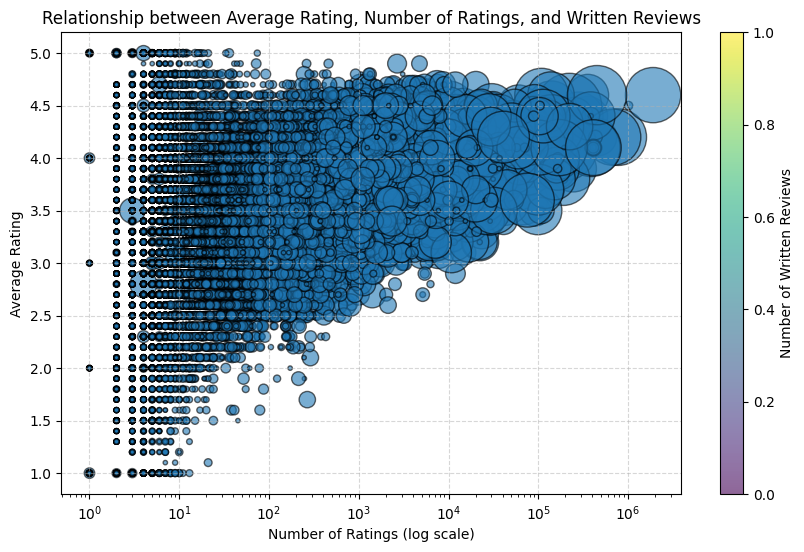

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

item_metadata = item_metadata.merge(review_counts, on='parent_asin', how='left')

plt.figure(figsize=(10, 6))
scatter = plt.scatter(item_metadata['rating_number'], item_metadata['average_rating'],
                      s=np.sqrt(item_metadata['review_count']) * 10,
                      alpha=0.6, edgecolors='k', cmap='viridis')

plt.xscale('log')
plt.xlabel("Number of Ratings (log scale)")
plt.ylabel("Average Rating")
plt.title("Relationship between Average Rating, Number of Ratings, and Written Reviews")
plt.colorbar(label="Number of Written Reviews")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


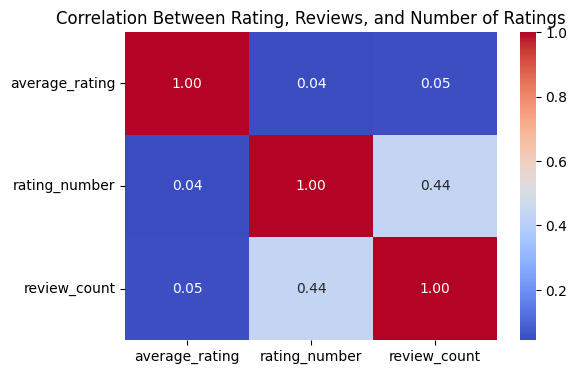

In [24]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(item_metadata[['average_rating', 'rating_number', 'review_count']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Rating, Reviews, and Number of Ratings")
plt.show()


Metedata is available for all items that are referenced in the user_reviews.

In [18]:
missing_item_ids = set(user_reviews['parent_asin']) - set(item_metadata['parent_asin'])
print("Missing item IDs:", missing_item_ids)

Missing item IDs: set()


### Explore scope for collaborative and content based filtering

> Add blockquote



# Tokenization of Reviews
If needed, convert ratings into implicit feedback (1 if rated, 0 if not).



In [19]:
user_reviews

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,1.0,malware,mcaffee IS malware,[],B07BFS3G7P,B0BQSK9QCF,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,1562182632076,0,False
1,5.0,Lots of Fun,I love playing tapped out because it is fun to...,[],B00CTQ6SIG,B00CTQ6SIG,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,1424120336000,0,True
2,5.0,Light Up The Dark,I love this flashlight app! It really illumin...,[],B0066WJLU6,B0066WJLU6,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,1362399267000,0,True
3,4.0,Fun game,One of my favorite games,[],B00KCYMAWK,B00KCYMAWK,AH6CATODIVPVUOJEWHRSRCSKAOHA,1561061428662,0,True
4,4.0,I am not that good at it but my kids are,Cute game. I am not that good at it but my kid...,[],B00P1RK566,B00P1RK566,AEINY4XOINMMJCK5GZ3M6MMHBN6A,1418257196000,0,True
...,...,...,...,...,...,...,...,...,...,...
4880176,5.0,Gog,Very fun and addictive and exciting,[],B0763N3MVW,B0763N3MVW,AGOKECUMAI3W6MC7A7KBFBJVPN7Q,1608919468753,0,True
4880177,1.0,WORST GAME EVER,WORST GAME EVER TOXIC PEOPLE AND BAD CONNECTIO...,[],B00ET56Y48,B00ET56Y48,AH6AMUNDOSZ2SGDIDMYSRE4RNMDQ,1609973647689,1,True
4880178,5.0,better!!!,This fabulous game is 10000 times better than ...,[],B009ZKSPDK,B009ZKSPDK,AH4PJ73QN75AJM5VSCT53AOADCGA,1369722216000,2,True
4880179,5.0,It Has Everything I Need And More,Awesome! I upgraded from CorelDraw 8. I was wo...,[],B00M9J3IOA,B00M9J3IOA,AHQETDYKHVDNGMGBWVJL6VJXJGFQ,1472923291000,0,True


In [37]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob

user_reviews = user_reviews[user_reviews['parent_asin'] == 'B00N28818A']

user_reviews['review'] = user_reviews['title'] + ' ' + user_reviews['text']
user_reviews['sentiment'] = user_reviews['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

user_reviews.head(15)

<ipython-input-38-92721b013065>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_reviews['review'] = user_reviews['title'] + ' ' + user_reviews['text']


,user_id,parent_asin,rating,title,text,timestamp,review,sentiment
662,AGDUXF4E7K4X5WBBCKNPG6AD2UCA,B00N28818A,1,need to make universally friendly for all devices,I try to be someone who is not solely dedicate...,2015-01-06 05:07:34.000,need to make universally friendly for all devi...,0.274545
699,AHJ2CDYLH4BNPIDVY3TIDSBNRRPA,B00N28818A,5,Always something new to watch,"Great Content, I Love the Original Series like...",2018-11-27 09:19:37.446,"Always something new to watch Great Content, I...",0.476278
919,AHF5OLUZ6VKGFAJ7J5CIPI57O7GQ,B00N28818A,5,Five Stars,"Right on, wish there would be casting option",2016-12-28 05:09:23.000,"Five Stars Right on, wish there would be casti...",0.285714
1024,AFTDSPCG32FV2VPWLEYPDQARTSQA,B00N28818A,5,Awesome,Awesome.,2019-02-05 14:59:54.327,Awesome Awesome.,1.000000
1043,AESGMCRKQKHIAIJUL72FWQYVS6MA,B00N28818A,3,Not what i expected,"Very jerky app, smooth operation not available...",2017-08-22 20:49:33.285,"Not what i expected Very jerky app, smooth ope...",0.233333
1184,AFIILFLTBWOTZ5Y7FAHBU3IQDCMQ,B00N28818A,5,Five Stars,I use this on my ps4 and I love it. It works o...,2016-02-05 17:09:35.000,Five Stars I use this on my ps4 and I love it....,0.500000
1504,AEI6PVESNCWAQYNYNQ25O4U4OIHQ,B00N28818A,1,Stick with Netflix.,Basically the same movies and tv shows that ar...,2015-06-29 07:01:38.000,Stick with Netflix. Basically the same movies ...,0.045833
2053,AHTBBASAHXHHOXKLSSZG2IPUDDFA,B00N28818A,5,Nice App,I recently tried the &#34;Prime Instant Video&...,2015-04-04 18:34:55.000,Nice App I recently tried the &#34;Prime Insta...,0.199809
2055,AG7H465T24KLO6MGEZB5WYY3DDJQ,B00N28818A,5,Great shows and movies!!,They have great original series.. boardwalk em...,2018-02-24 00:51:43.098,Great shows and movies!! They have great origi...,0.621875
2865,AGT2JM2VGEZD7NKADGKSCEHZB7CQ,B00N28818A,5,Five Stars,Great selection,2016-05-12 07:25:50.000,Five Stars Great selection,0.800000


<ipython-input-40-b8bb48b5369f>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['sentiment'], label=f'{rating} Star', shade=True)
<ipython-input-40-b8bb48b5369f>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['sentiment'], label=f'{rating} Star', shade=True)
<ipython-input-40-b8bb48b5369f>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['sentiment'], label=f'{rating} Star', shade=True)
<ipython-input-40-b8bb48b5369f>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['s

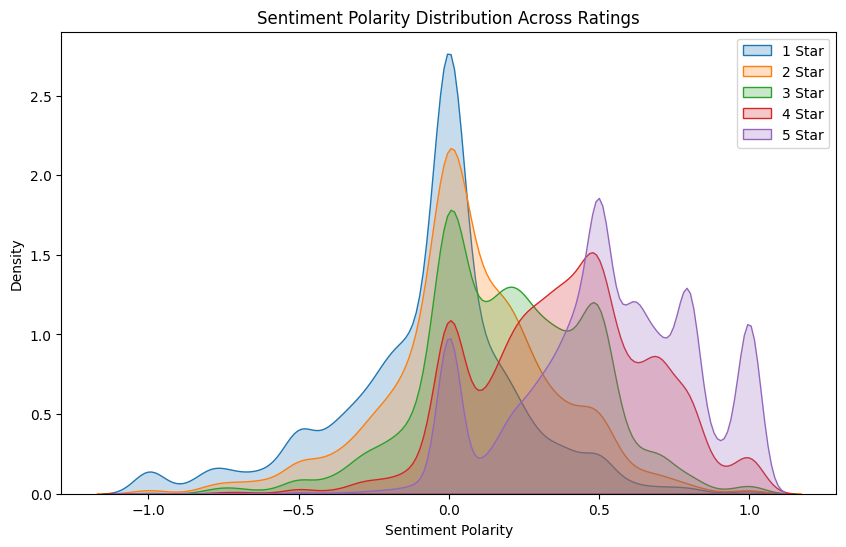

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
for rating in sorted(user_reviews['rating'].unique()):
    subset = user_reviews[user_reviews['rating'] == rating]
    sns.kdeplot(subset['sentiment'], label=f'{rating} Star', shade=True)

plt.xlabel('Sentiment Polarity')
plt.ylabel('Density')
plt.title('Sentiment Polarity Distribution Across Ratings')
plt.legend()
plt.show()

In [41]:
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from datasets import load_dataset
from textblob import TextBlob
from sentence_transformers import SentenceTransformer

dataset = 'McAuley-Lab/Amazon-Reviews-2023'

reviews = load_dataset(dataset, 'raw_review_Software', trust_remote_code=True)
user_reviews = reviews['full'].to_pandas()
del reviews

user_reviews = user_reviews[user_reviews['parent_asin'] == 'B00N28818A']
user_reviews = user_reviews[['user_id', 'parent_asin', 'rating', 'title', 'text', 'timestamp']]

def remove_punctuation(document):

    no_punct = ''.join([character for character in document if character not in punctuation])

    return no_punct

def remove_stopwords(document):

    words = [word for word in document if not word in stop_words]

    return words

porter = PorterStemmer()

def stemmer(document):

    stemmed_document = [porter.stem(word) for word in document]

    return stemmed_document

stop_words = set(stopwords.words('english'))

user_reviews['review'] = user_reviews['title'] + ' ' + user_reviews['text']
user_reviews['review_processed'] = user_reviews['review'].str.lower()
user_reviews['review_processed'] = user_reviews['review_processed'].apply(remove_punctuation)
user_reviews['review_processed'] = user_reviews['review_processed'].str.replace(r'\d+', '', regex=True)
user_reviews['review_processed'] = user_reviews['review_processed'].apply(word_tokenize)
user_reviews['review_processed'] = user_reviews['review_processed'].apply(remove_stopwords)
user_reviews['review_processed'] = user_reviews['review_processed'].apply(stemmer)

user_reviews['sentiment'] = user_reviews['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
bert_model = SentenceTransformer('all-MiniLM-L6-v2')
user_reviews['review_detokenized'] = user_reviews['review_processed'].apply(TreebankWordDetokenizer().detokenize)
user_reviews['bert_embedding'] = user_reviews['review_detokenized'].apply(lambda x: bert_model.encode(x))

user_reviews[['user_id', 'parent_asin', 'rating',	'title', 'text', 'review', 'review_processed', 'sentiment', 'bert_embedding']].head(15)

,user_id,parent_asin,rating,title,text,review,review_processed,sentiment,bert_embedding
0,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,B0BQSK9QCF,1.0,malware,mcaffee IS malware,malware mcaffee IS malware,"[malwar, mcaffe, malwar]",0.000000,"[-0.035163686, 0.0103913015, 7.115581e-05, 0.0..."
1,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,B00CTQ6SIG,5.0,Lots of Fun,I love playing tapped out because it is fun to...,Lots of Fun I love playing tapped out because ...,"[lot, fun, love, play, tap, fun, watch, town, ...",0.400000,"[-0.04770106, -0.015891232, 0.03607068, -0.039..."
2,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,B0066WJLU6,5.0,Light Up The Dark,I love this flashlight app! It really illumin...,Light Up The Dark I love this flashlight app! ...,"[light, dark, love, flashlight, app, realli, i...",0.280469,"[-0.090288065, -0.018142018, -0.025567722, 0.0..."
3,AH6CATODIVPVUOJEWHRSRCSKAOHA,B00KCYMAWK,4.0,Fun game,One of my favorite games,Fun game One of my favorite games,"[fun, game, one, favorit, game]",0.133333,"[-0.023053482, 0.058434553, -0.01570116, -0.09..."
4,AEINY4XOINMMJCK5GZ3M6MMHBN6A,B00P1RK566,4.0,I am not that good at it but my kids are,Cute game. I am not that good at it but my kid...,I am not that good at it but my kids are Cute ...,"[good, kid, cute, game, good, kid, love, nik, ...",0.425000,"[-0.10075144, 0.014918627, -0.028490193, -0.08..."
5,AEINY4XOINMMJCK5GZ3M6MMHBN6A,B00CWY76CC,4.0,good game,"Made me think , variety of the puzzles kept it...","good game Made me think , variety of the puzzl...","[good, game, made, think, varieti, puzzl, kept...",0.220000,"[-0.06449226, -0.02541187, -0.07404629, -0.087..."
6,AEJDETWITK2KGACH7FUBMY33PPSQ,B018IOV40E,5.0,My favorite showVoice my favorite show,See the voice anytime my My favorite show,My favorite showVoice my favorite show See the...,"[favorit, showvoic, favorit, show, see, voic, ...",0.500000,"[-0.04554861, 0.009105896, -0.011063017, -0.08..."
7,AFSKPY37N3C43SOI5IEXEK5JSIYA,B00EZPXYP4,5.0,Great Antivirus product,Not sure what else can be said about Norton pr...,Great Antivirus product Not sure what else can...,"[great, antiviru, product, sure, els, said, no...",0.148810,"[-0.052364103, 0.047927316, -0.014458848, -0.1..."
8,AFSKPY37N3C43SOI5IEXEK5JSIYA,B002I7PGT8,1.0,Fraught with too many problems,Save your money and purchase a good (i.e. Nort...,Fraught with too many problems Save your money...,"[fraught, mani, problem, save, money, purchas,...",0.450000,"[-0.081450984, 0.08311311, -0.020960005, -0.08..."
9,AFSKPY37N3C43SOI5IEXEK5JSIYA,B005ZKC4FO,4.0,Norton Internet Security,I always use Norton as my PC security applicat...,Norton Internet Security I always use Norton a...,"[norton, internet, secur, alway, use, norton, ...",0.152000,"[-0.028169557, 0.010341783, 0.004609101, -0.14..."


In [29]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

text_detokenized = user_reviews['review_processed'].apply(TreebankWordDetokenizer().detokenize)
# text_detokenized

,review_processed
0,malwar mcaffe malwar
1,lot fun love play tap fun watch town grow earn...
2,light dark love flashlight app realli illumin ...
3,fun game one favorit game
4,good kid cute game good kid love nik wallenda
5,good game made think varieti puzzl kept fun pl...
6,favorit showvoic favorit show see voic anytim ...
7,great antiviru product sure els said norton pr...
8,fraught mani problem save money purchas good i...
9,norton internet secur alway use norton pc secu...


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()

sparse_dtm = countvec.fit_transform(text_detokenized)
sparse_dtm

<50x690 sparse matrix of type '<class 'numpy.int64'>'
	with 1321 stored elements in Compressed Sparse Row format>

In [33]:
dtm = pd.DataFrame(sparse_dtm.toarray(), columns = countvec.get_feature_names_out (), index = user_reviews.index)
dtm

,ab,abl,accept,access,accost,account,accumul,actual,ad,add,...,yeah,year,yet,youd,youll,youngster,your,youv,yr,zynga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
